# Transfer Learning:

In transfer learning, the knowledge of an already trained machine learning model is applied to a different but related problem. For example, if you trained a simple classifier to predict whether an image contains a watch, you could use the knowledge that the model gained during its training to recognize other objects like clock.


#### Pre trained model as Feature Extractor
Remove the last dense layer which is performing classification and use this pre trained model as Feature Extractor.Fixed feature extractor for the new dataset.

For example, if you want to build a self learning car. You can spend years to build a decent image recognition algorithm from scratch or you can take inception model (a pre-trained model) from Google which was built on ImageNet data to identify images in those pictures.


# Dataset Prepration 

In [13]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])
    
    
# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

['0_background', '1_trash', '2_paper', '3_plastic', '4_metal', '5_electronic_invoice', '6_bubble_wrap', '7_thin_plastic_bag', '8_fruit_mesh_bag', '9_thin_film_paper_cup']
Types of classes labels found:  10
         Labels                                image
0  0_background  dataset_path/0_background/00000.png
1  0_background  dataset_path/0_background/00001.png
2  0_background  dataset_path/0_background/00002.png
3  0_background  dataset_path/0_background/00003.png
4  0_background  dataset_path/0_background/00004.png
                     Labels                                         image
1345  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00135.png
1346  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00136.png
1347  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00137.png
1348  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00138.png
1349  9_thin_film_paper_cup  dataset_path/9_thin_film_paper_cup/00139.png


In [14]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  1350
Labels
2_paper                  220
3_plastic                210
1_trash                  200
4_metal                  160
9_thin_film_paper_cup    140
5_electronic_invoice     100
6_bubble_wrap            100
8_fruit_mesh_bag         100
7_thin_plastic_bag        80
0_background              40
Name: count, dtype: int64


In [15]:
import cv2
path = 'C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data/'
dataset_path = os.listdir('C:/Users/ASUS/Desktop/HPS/Dataset/Dataset_Custom/Preprocessed_Data')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [16]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(1350, 224, 224, 3)

In [17]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (y)
print (y)

['0_background' '0_background' '0_background' ... '9_thin_film_paper_cup'
 '9_thin_film_paper_cup' '9_thin_film_paper_cup']
[0 0 0 ... 9 9 9]


In [18]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
print(Y)
print(Y[:5])
print(Y[35:])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [19]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(1282, 224, 224, 3)
(1282, 10)
(68, 224, 224, 3)
(68, 10)


## Transfer learning from pre-trained weights

#### Here we initialize the model with pre-trained ImageNet weights,and we fine-tune it on our own dataset.



The first step to transfer learning is to freeze all layers and train only the top layers. For this step, a relatively large learning rate (1e-2) can be used. 

EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

include_top=False means we don't want to use classification layer(Dense from the pretrained network)

In [20]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


NUM_CLASSES = 10
IMG_SIZE = 224



In [21]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    #x = img_augmentation(inputs)
    x = inputs
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = True

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [22]:

model = build_model(num_classes=NUM_CLASSES)
# from tensorflow.keras.models import load_model
# model = load_model('C:\\Users\\ASUS\\Desktop\HPS\\EfficientNet\\model_result\\V2_40ep_transfer_learning.h5')


In [23]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


#plot_hist(hist)

In [24]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

hist = model.fit(train_x, train_y, epochs=40, verbose=2,validation_data=(test_x, test_y), callbacks=[tensorboard_callback])
plot_hist(hist)

model.save("V3_40ep_transfer_learning_unfreezed.h5")


Epoch 1/40
41/41 - 173s - loss: 2.6335 - accuracy: 0.4828 - val_loss: 98227928.0000 - val_accuracy: 0.0882 - 173s/epoch - 4s/step
Epoch 2/40
41/41 - 168s - loss: 1.7945 - accuracy: 0.5577 - val_loss: 41567.8203 - val_accuracy: 0.2794 - 168s/epoch - 4s/step
Epoch 3/40
41/41 - 164s - loss: 1.4210 - accuracy: 0.6115 - val_loss: 116271.0000 - val_accuracy: 0.2794 - 164s/epoch - 4s/step
Epoch 4/40
41/41 - 165s - loss: 2.1357 - accuracy: 0.4766 - val_loss: 428803.8125 - val_accuracy: 0.2794 - 165s/epoch - 4s/step
Epoch 5/40
41/41 - 163s - loss: 1.7062 - accuracy: 0.6076 - val_loss: 18999.3750 - val_accuracy: 0.0735 - 163s/epoch - 4s/step
Epoch 6/40


KeyboardInterrupt: 

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 1s 1s/step - loss: 0.8600 - accuracy: 0.0000e+00
Loss = 0.8599830269813538
Test Accuracy = 0.0


Input image shape: (1, 224, 224, 3)
1/1 [==============================] - 1s 1s/step
predicted class:  [[0.06466243 0.2904446  0.64489293]]


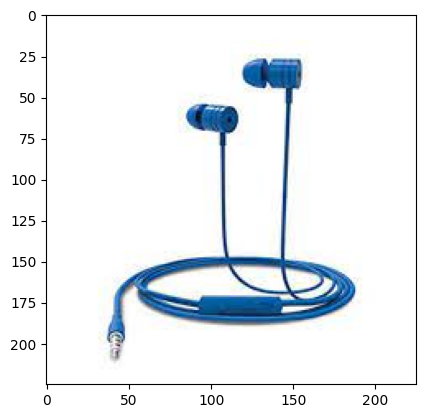

In [ ]:
img_path = 'dataset/earphone/21.png'


img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)



preds=model.predict(x)
print("predicted class: ", preds )    # probabilities for being in each of the 3 classes